In [1]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

In [2]:
img_mpl = plt.imread('pothole1.jpeg')
img_cv2 = cv2.imread('pothole1.jpeg')

In [16]:
pip install scikit-image

  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/d9/17/b561823143eb931de0f82fed03ae128ef954a9641309602ea0901c357f95/scikit_image-0.24.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for imageio>=2.33 from https://files.pythonhosted.org/packages/4e/e7/26045404a30c8a200e960fb54fbaf4b73d12e58cd28e03b306b084253f4f/imageio-2.36.0-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/50/0a/435d5d7ec64d1c8b422ac9ebe42d2f3b2ac0b3f8a56f5c04dd0f3b7ba83c/tifffile-2024.9.20-py3-none-any.whl.metadata
  Obtaining dependency information for lazy-loader>=0.4 from https://files.pythonhosted.org/packages/83/60/d497a310bde3f01cb805196ac61b7ad6dc5dcf8dce66634dc34364b20b4f/lazy_loader-0.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.9 MB 1.7 MB/s eta 0:00:08
  


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


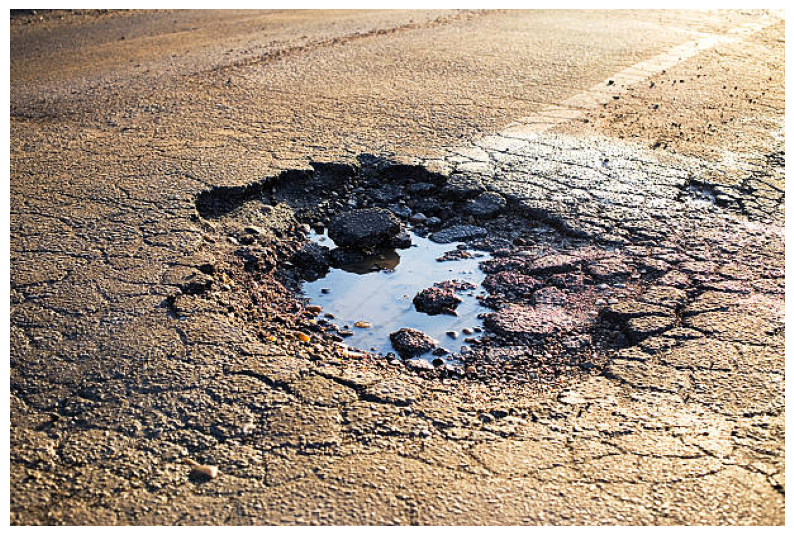

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

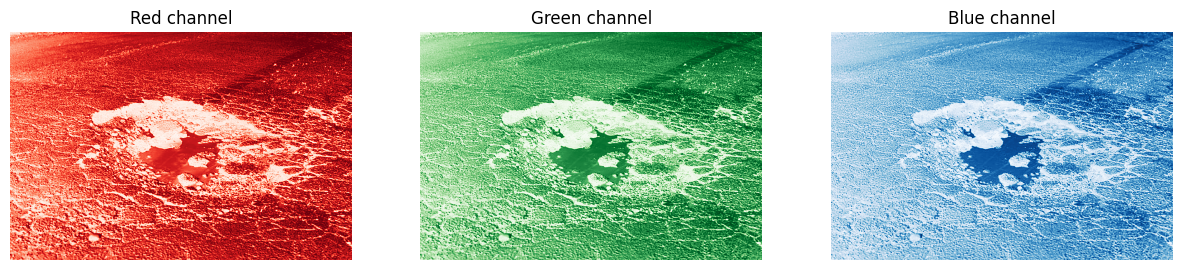

In [5]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.savefig('rgbe.jpg')
plt.show()

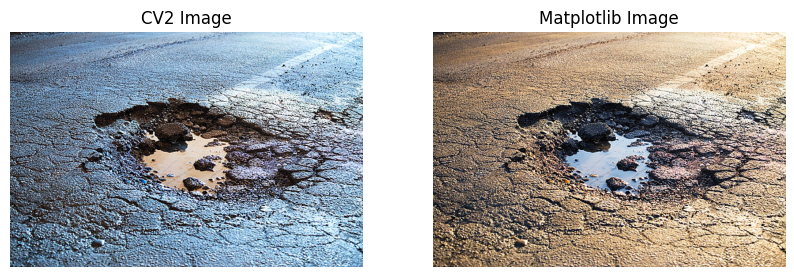

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

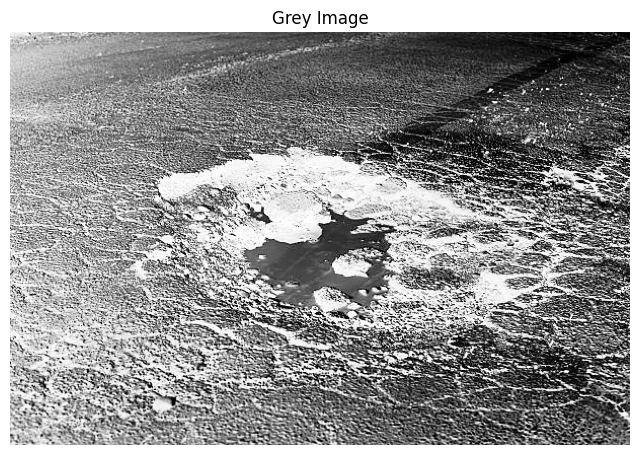

In [7]:
img_gray = cv2.cvtColor(img_mpl, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

In [8]:
import cv2 
  
# read the image file 
img = cv2.imread('pothole1.jpeg', 2) 
  
ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
  
# converting to its binary form 
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
  
cv2.imshow("Binary", bw_img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [9]:
import cv2

image = cv2.imread('pothole1.jpeg')

b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


# RGB - Blue
cv2.imshow('B-RGB', b)

# RGB - Green
cv2.imshow('G-RGB', g)

# RGB - Red
cv2.imshow('R-RGB', r)

cv2.waitKey(0)

-1

In [10]:
import cv2 
  
# read the image file 
img = r
  
ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
  
# converting to its binary form 
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
  
cv2.imshow("Binary", bw_img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 


In [11]:
import cv2 
  
# read the image file 
img = r
  
ret, bw_img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY) 
  
# converting to its binary form 
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
  
cv2.imshow("Binary", bw_img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [12]:
# Use the cvtColor() function to grayscale the image 
gray_image = cv2.cvtColor(r, cv2.COLOR_BGR2GRAY) 
  
cv2.imshow('Grayscale', gray_image) 
cv2.waitKey(0)   
  
# Window shown waits for any key pressing event 
cv2.destroyAllWindows()

In [37]:
# convert the input image to grayscale
gray = cv2.cvtColor(r, cv2.COLOR_BGR2GRAY)

# apply thresholding to convert grayscale to binary image
ret,thresh = cv2.threshold(gray,65,255,0)
thresh = cv2.bitwise_not(thresh)
# Display the Binary Image
cv2.imshow("Binary Image", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("GRAY.png", thresh)

True

In [48]:
from skimage import morphology
cleaned = morphology.remove_small_objects(thresh, min_size=1000, connectivity=500000)
# Display the Binary Image
# cv2.imshow("Cleaned Binary Image", cleaned)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imwrite("GRAY-cleaned.png", cleaned)

In [49]:
def bwareaopen(img, min_size, connectivity=8):
        """Remove small objects from binary image (approximation of 
        bwareaopen in Matlab for 2D images).
    
        Args:
            img: a binary image (dtype=uint8) to remove small objects from
            min_size: minimum size (in pixels) for an object to remain in the image
            connectivity: Pixel connectivity; either 4 (connected via edges) or 8 (connected via edges and corners).
    
        Returns:
            the binary image with small objects removed
        """
    
        # Find all connected components (called here "labels")
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
            img, connectivity=connectivity)
        
        # check size of all connected components (area in pixels)
        for i in range(num_labels):
            label_size = stats[i, cv2.CC_STAT_AREA]
            
            # remove connected components smaller than min_size
            if label_size < min_size:
                img[labels == i] = 0
                
        return img

In [59]:
import cv2
im = cv2.imread('GRAY.png')
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((10, 10)))
# cv2.imshow("Clean image", clean)
cv2.imwrite("GRAY-cleaned.png", cleaned)

True

In [96]:
nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(thresh)
# stats (and the silenced output centroids) gives some information about the blobs. See the docs for more information. 
# here, we're interested only in the size of the blobs, contained in the last column of stats.
sizes = stats[:, -1]
# the following lines result in taking out the background which is also considered a component, which I find for most applications to not be the expected output.
# you may also keep the results as they are by commenting out the following lines. You'll have to update the ranges in the for loop below. 
sizes = sizes[1:]
nb_blobs -= 1

# minimum size of particles we want to keep (number of pixels).
# here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever.
min_size = 179870

# output image with only the kept components
im_result = np.zeros_like(im_with_separated_blobs)
# for every component in the image, keep it only if it's above min_size
for blob in range(nb_blobs):
    if sizes[blob] >= min_size:
        # see description of im_with_separated_blobs above
        im_result[im_with_separated_blobs == blob + 1] = 255

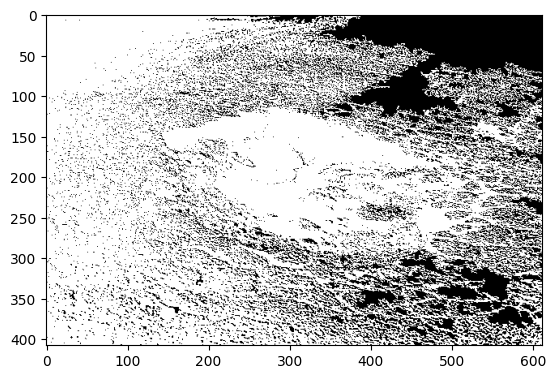

In [97]:
# cv2.imshow("Cleaned Binary Image", im_result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imwrite("GRAY-cleaned.png", im_result)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# imgplot = plt.imshow(im_result)
plt.imshow(im_result, cmap="gray")
plt.show()

In [159]:
# Importing OpenCV
import cv2

# Importing numpy
import numpy as np

# Reading image
img = cv2.imread("pothole.jpeg",0)

# Converting grayscale image to binary using thresholding
ret, img_binary = cv2.threshold(img, 175, 255, cv2.THRESH_BINARY)

# Displaying the original image and binary image
cv2.imshow('Original',img)
cv2.imshow('Binary', img_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [106]:
# Defining kernel
kernel = np.ones((1,1),dtype=np.uint8)
# Applying dilation operation
img_dilate = cv2.dilate(img_binary, kernel, iterations=1)
# Displaying the dilated image
cv2.imshow('Dilate', img_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [160]:
# Defining kernel
kernel = np.ones((2,2),dtype=np.uint8)
# Applying erosion operation
img_erode = cv2.erode(img_binary, kernel, iterations=4)
# Displaying the eroded image
cv2.imshow('Erode', img_erode)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [125]:
# Defining kernel
kernel = np.ones((2,2),dtype=np.uint8)
# Applying dilation operation
img_dilate = cv2.dilate(img_erode, kernel, iterations=2)
# Displaying the dilated image
cv2.imshow('Dilate', img_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [161]:
params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 1000
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

In [149]:
keypoints = detector.detect(img_dilate)

In [150]:
img_with_keypoints = cv2.drawKeypoints(img_dilate, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [151]:
cv2.imshow('Blob Detection', img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [141]:
# Choose 4 or 8 for connectivity type
connectivity = 1000  
output = cv2.connectedComponentsWithStats(img_dilate, connectivity, cv2.CV_32S)

num_labels = output[0]
stats = output[2]

for label in range(1,num_labels):
    blob_area = stats[label, cv2.CC_STAT_AREA]
    blob_width = stats[label, cv2.CC_STAT_WIDTH]
    blob_height = stats[label, cv2.CC_STAT_HEIGHT]

In [142]:
print(blob_area)

9


In [162]:
import numpy as np 
import cv2

image = img_dilate
mask = np.zeros(image.shape, dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
threshold_area = 0.5
for c in cnts:
    area = cv2.contourArea(c)
    if area > threshold_area:
        cv2.drawContours(mask, [c], -1, (36,255,12), -1)

cv2.imshow('mask', mask)
cv2.waitKey()

error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<1,-1,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [163]:
# Generate intermediate image; use morphological closing to keep parts of the brain together
inter = img_dilate

# Find largest contour in intermediate image
cnts, _ = cv2.findContours(inter, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt = max(cnts, key=cv2.contourArea)

# Output
out = np.zeros(img.shape, np.uint8)
cv2.drawContours(out, [cnt], -1, 255, cv2.FILLED)
out = cv2.bitwise_and(img, out)

cv2.imshow('img', img)
cv2.imshow('inter', inter)
#cv2.imshow('out', out)
cv2.waitKey(0)
cv2.destroyAllWindows()